In [32]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
import seaborn as sns

dataframe = pd.read_csv('BLE_LTER_sea_ice_measurements.csv', parse_dates=["date_time"]) #transforming date_time colum into a Datetime

#get only the columns we want
df = pd.DataFrame(dataframe, columns=['lagoon','date_time','hole1_ice_thickness_m','hole2_ice_thickness_m',
                                'hole3_ice_thickness_m', 'spot1_snow_depth_m', 'spot2_snow_depth_m', 'spot3_snow_depth_m',
                                'spot4_snow_depth_m','spot5_snow_depth_m', 'spot6_snow_depth_m', 'spot7_snow_depth_m','spot8_snow_depth_m',
                                'spot9_snow_depth_m','spot10_snow_depth_m', 'freeboard_m', 'station'])

df.head()

,lagoon,date_time,hole1_ice_thickness_m,hole2_ice_thickness_m,hole3_ice_thickness_m,spot1_snow_depth_m,spot2_snow_depth_m,spot3_snow_depth_m,spot4_snow_depth_m,spot5_snow_depth_m,spot6_snow_depth_m,spot7_snow_depth_m,spot8_snow_depth_m,spot9_snow_depth_m,spot10_snow_depth_m,freeboard_m,station
0,Simpson,2019-04-21 12:21:00-08:00,1.32,NaN,NaN,0.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01,SILD1
1,Simpson,2021-04-23 12:20:00-08:00,1.71,NaN,NaN,0.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,SILD1
2,Simpson,2022-04-18 12:16:00-08:00,1.53,NaN,NaN,0.09,0.15,0.07,0.08,0.08,0.05,0.12,0.16,0.12,0.11,0.11,SILD1
3,Simpson,2023-04-20 11:12:00-08:00,1.40,1.2,NaN,0.04,0.09,0.08,0.37,0.41,0.16,0.26,0.17,0.25,0.13,0.08,SILD1
4,Simpson,2023-04-23 12:51:00-08:00,1.30,NaN,NaN,0.10,0.10,0.11,0.11,0.15,0.06,0.14,0.08,0.17,0.15,0.05,SILD2


Here I'll use a different approach from the previous analysis. I´ll group by date and take the mean of the different columns, which means I wont be making any distinction between lagoons or lagoon sites. Then, I'll take the mean across rows, to have only one reading value from the different measurment holes.

In [33]:
grouped_df = df.groupby('date_time')[['hole1_ice_thickness_m','hole2_ice_thickness_m',
                                'hole3_ice_thickness_m', 'spot1_snow_depth_m', 'spot2_snow_depth_m', 'spot3_snow_depth_m',
                                'spot4_snow_depth_m','spot5_snow_depth_m', 'spot6_snow_depth_m', 'spot7_snow_depth_m','spot8_snow_depth_m',
                                'spot9_snow_depth_m','spot10_snow_depth_m', 'freeboard_m']].agg('mean')

In [34]:
ice_df = grouped_df[['hole1_ice_thickness_m','hole2_ice_thickness_m',
                                'hole3_ice_thickness_m']].agg(['mean'], axis=1)
snow_df = grouped_df[['spot1_snow_depth_m', 'spot2_snow_depth_m', 'spot3_snow_depth_m',
                                'spot4_snow_depth_m','spot5_snow_depth_m', 'spot6_snow_depth_m', 'spot7_snow_depth_m','spot8_snow_depth_m',
                                'spot9_snow_depth_m','spot10_snow_depth_m']].agg(['mean'], axis=1)
freebord_df = grouped_df.freeboard_m

In [35]:
#concatenate the three dfs
df2= pd.concat([ice_df, snow_df, freebord_df], axis=1, ignore_index = True) 

In [36]:
# Rename columns
df2.rename(columns={0: 'mean_ice', 1: 'mean_snow', 2: 'freebord'}, inplace=True) #inplace=True means we do not need to assign the modified df to a new variable

df2.reset_index(inplace=True)
df2['date_time'] = pd.to_datetime(df2['date_time'])
df2['date_time'] = df2['date_time'].dt.year

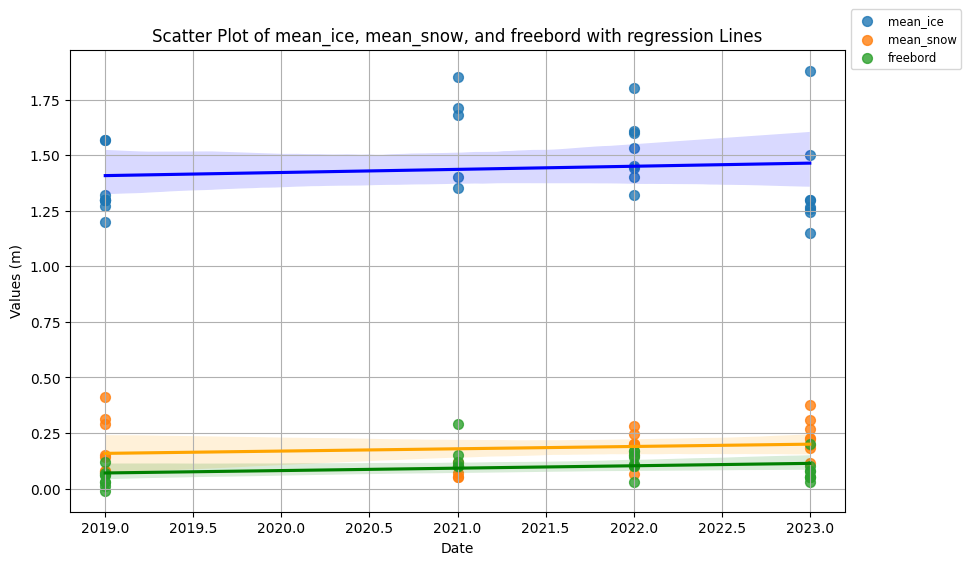

In [37]:
# Plotting
plt.figure(figsize=(10, 6))  # Adjust figsize as needed

# Scatter plot with regression line for mean_ice
sns.regplot(x='date_time', y='mean_ice', data=df2, scatter_kws={'s': 50}, line_kws={'color': 'blue'}, label='mean_ice')

# Scatter plot with regression line for mean_snow
sns.regplot(x='date_time', y='mean_snow', data=df2, scatter_kws={'s': 50}, line_kws={'color': 'orange'}, label='mean_snow')

# Scatter plot with regression line for freebord
sns.regplot(x='date_time', y='freebord', data=df2, scatter_kws={'s': 50}, line_kws={'color': 'green'}, label='freebord')

plt.xlabel('Date')
plt.ylabel('Values (m)')

plt.title('Scatter Plot of mean_ice, mean_snow, and freebord with regression Lines')
plt.grid(True)
plt.legend(loc='upper left', fontsize='small', bbox_to_anchor=(1, 1.1))
plt.show()

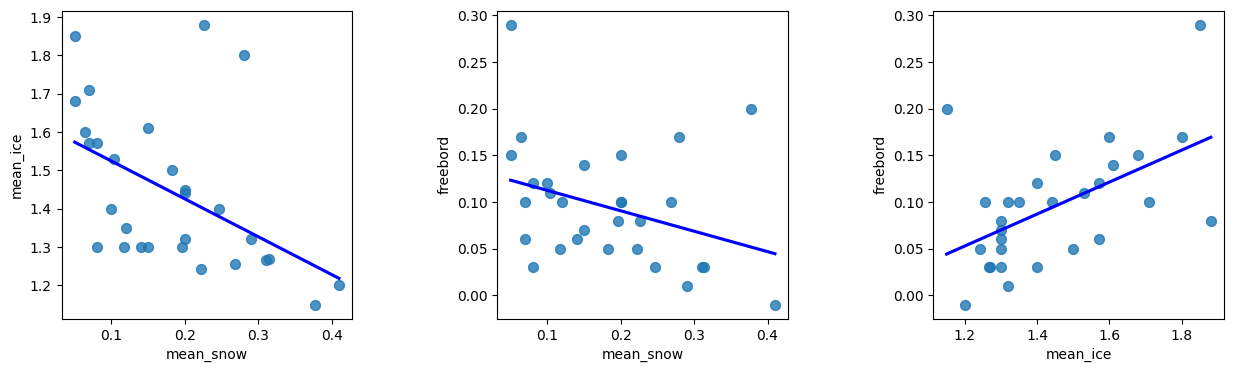

<Figure size 640x480 with 0 Axes>

In [38]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.regplot(x='mean_snow', y='mean_ice', data=df2, scatter_kws={'s': 50}, line_kws={'color': 'blue'}, ci=None, ax=axes[0])
sns.regplot(x='mean_snow', y='freebord', data=df2, scatter_kws={'s': 50}, line_kws={'color': 'blue'},ci=None, ax=axes[1])
sns.regplot(x='mean_ice', y='freebord', data=df2, scatter_kws={'s': 50}, line_kws={'color': 'blue'}, ci=None, ax=axes[2])

plt.subplots_adjust(wspace=0.5)  # Adjust the horizontal space between subplots

plt.show()
plt.tight_layout()

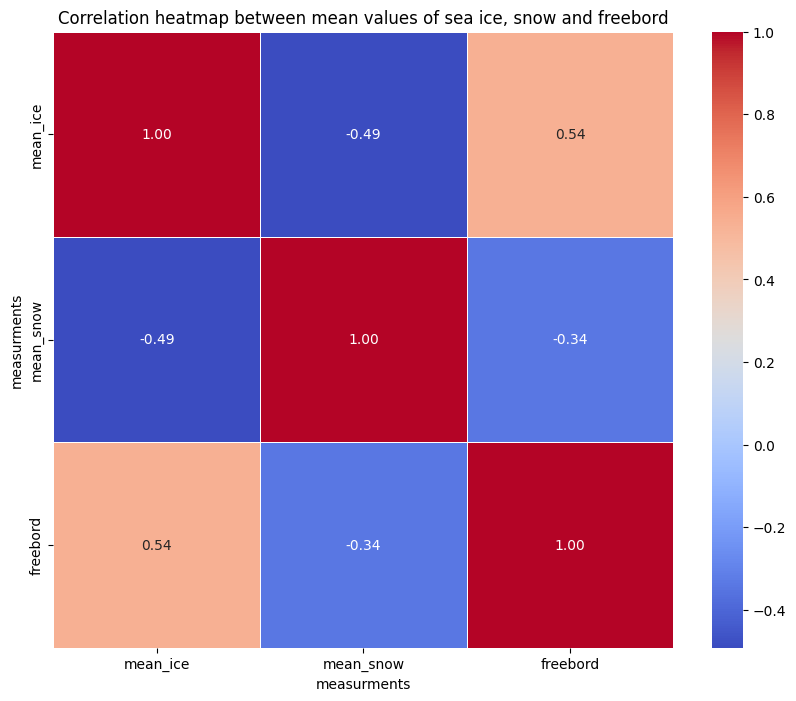

In [39]:
# Calculate correlation matrix
columns = ['mean_ice', 'mean_snow', 'freebord']
correlation_matrix = df2[columns].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation heatmap between mean values of sea ice, snow and freebord')
plt.xlabel('measurments')
plt.ylabel('measurments')
plt.savefig('correlation heatmap.jpg', bbox_inches='tight')

plt.show()

Assuming non-linearity, let's use a Spearman correlation coeficient to verify if these relations are statistically significant:

In [40]:
from scipy.stats import spearmanr

# Define the pairs where you found the strongest correlations
variable_pairs = [('mean_ice', 'mean_snow'),
                  ('mean_ice', 'freebord'),
                  ('mean_snow', 'freebord')]

# Iterate over each pair and calculate Spearman correlation
for pair in variable_pairs:
    var1, var2 = pair
    # Drop rows with missing values in either variable
    data_pair = df2[[var1, var2]].dropna()
    # Calculate Spearman correlation
    spearman_corr, p_value = spearmanr(data_pair[var1], data_pair[var2])
    print(f"Spearman correlation between {var1} and {var2}: {spearman_corr:.3f}")
    print(f"P-value: {p_value:.3f}\n")

Spearman correlation between mean_ice and mean_snow: -0.568
P-value: 0.001

Spearman correlation between mean_ice and freebord: 0.524
P-value: 0.004

Spearman correlation between mean_snow and freebord: -0.394
P-value: 0.034

